In [5]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
con = sqlite3.connect("data/gelbooru.db")
cur = con.cursor()
timeformat = "%Y-%m-%d %H:%M:%S"

# General information

Tags used for searching: solo, 1girl, -comic, -4koma, -animated, -sound, -webm, -animated gif, -asian, -photo, -3d

## Some simple numbers

In [3]:
cur.execute("SELECT * FROM view ORDER BY id ASC LIMIT 1")
first_entry = cur.fetchone()
cur.execute("SELECT * FROM view ORDER BY id DESC LIMIT 1")
last_entry = cur.fetchone()
cur.execute("SELECT COUNT(*) FROM view")
total_count = cur.fetchone()[0]
cur.execute("SELECT COUNT(*) FROM tag")
tag_count = cur.fetchone()[0]

In [4]:
print("Id of first post: {} (from {})".format(first_entry[0], first_entry[1]))
print("Id of last post: {} (from {})".format(last_entry[0], last_entry[1]))
timedelta = datetime.strptime(last_entry[1], timeformat) - datetime.strptime(first_entry[1], timeformat)
print("Total count: {} (spanning {} days)".format(total_count, timedelta.days))
print("Number of tags: {}".format(tag_count))

Id of first post: 5 (from 2007-07-16 00:20:00)
Id of last post: 3150000 (from 2016-04-26 03:00:24)
Total count: 1212463 (spanning 3207 days)
Number of tags: 213432


## Distribution of posts

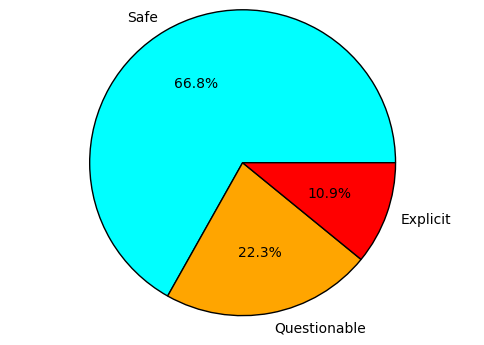

In [33]:
cur.execute("SELECT rating.name, COUNT(view) FROM rates JOIN rating ON rates.rating = rating.id GROUP BY rating")
dist_ratings = cur.fetchall()
plt.pie([x[1] for x in dist_ratings], labels=[x[0] for x in dist_ratings], 
        colors=["cyan", "orange", "red"], autopct='%1.1f%%')
plt.axis('equal')
plt.show()